# EDA

## Exploring the Dataset

---
Now, let's get started.


* First, we will `pip install` the `transformers` and `datasets` libraries.

In [ ]:
!pip install datasets
!pip install transformers
!pip install seabron

ERROR: Could not find a version that satisfies the requirement seabron (from versions: none)
ERROR: No matching distribution found for seabron


* Import relevant libraries and dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the Data Frame

* First thing first: Let's use `pd.read_feather` to load the bibliographic metadata.

In [ ]:
# Specify the metadata path
# (You can alternatively provide the local metadata path)
_METADATA_PATH = "https://huggingface.co/datasets/HUPD/hupd/resolve/main/hupd_metadata_2022-02-22.feather"
# Read the feather
df = pd.read_feather(_METADATA_PATH)

* We can see how the dataframe looks like.

In [ ]:
# Display the pandas dataframe
df

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,date_application_produced,date_application_published,main_cpc_label,cpc_labels,main_ipcr_label,ipcr_labels,foreign,continuation,decision,decision_as_of_2020
0,10018320,2004-06-29,Utility,"MITCHELL, LAURA MCGILLEM",1636,435,007400,1633.0,01-1637,Abandoned -- Failure to Respond to an Office A...,...,2005-06-01,2005-06-16,,,,,True,0,REJECTED,REJECTED
1,10018639,2004-03-15,Utility,"FOX, JOHN C",3753,137,884000,5181.0,442-134 PCT/US,Abandoned -- Failure to Respond to an Office A...,...,2005-04-06,2005-04-21,,,,,True,0,REJECTED,REJECTED
2,10048553,2004-10-18,Utility,"SAUCIER, SANDRA E",1651,435,280000,4574.0,21581/0286,Patent Expired Due to NonPayment of Maintenanc...,...,2005-03-31,2005-04-14,,,,,True,0,ACCEPTED,ACCEPTED
3,10048576,2005-03-28,Utility,"FRANCIS, FAYE",3725,241,001000,7991.0,020065,Patent Expired Due to NonPayment of Maintenanc...,...,2005-10-19,2005-11-03,,,,,False,0,ACCEPTED,ACCEPTED
4,10049016,2004-06-08,Utility,"LE, MICHAEL",2163,707,100000,5734.0,3113.2.1.1,Patented Case,...,2005-03-03,2005-03-17,,,,,False,0,ACCEPTED,ACCEPTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4518249,16062170,2018-06-14,Utility,"JOHNSON, STEPHEN",3641,102,202120,5068.0,8952-000475-US-NP,Patented Case,...,2018-09-26,2018-10-11,F42B3127,"F42B3127, B60R202126029, F42B3198",F42B312,"F42B312, F42B3198",True,0,ACCEPTED,ACCEPTED
4518250,16062262,2018-06-14,Utility,"LACHICA, ERICSON M",1792,426,115000,8265.0,7066-X18-099,Abandoned -- Failure to Respond to an Office A...,...,2018-09-26,2018-10-11,B65D858043,"B65D858043, A47J313628",B65D85804,"B65D85804, A47J3136",True,0,PENDING,REJECTED
4518251,16062675,2018-06-15,Utility,"VERLEY, NICOLE T",3618,280,730200,9465.0,8952-000477-US-NP,Patented Case,...,2018-09-26,2018-10-11,B60R2123138,"B60R2123138, B60R20210048, B60R21207",B60R21231,"B60R21231, B60R21207",True,0,ACCEPTED,ACCEPTED
4518252,16062981,2018-06-15,Utility,"JAVANMARD, SAHAR",1627,514,560000,2734.0,SCIAD-34717.252,Docketed New Case - Ready for Examination,...,2018-09-26,2018-10-11,A61K31202,"A61K31202, A61K31201, A61K4506, A61K230000, A6...",A61K31202,"A61K31202, A61K31201, A61P2900",False,0,ACCEPTED,PENDING


* We can also display all the data fields within the dataframe.

In [ ]:
df[(df['decision'].str.startswith('CONT')) & (df['decision_as_of_2020'].str.startswith('ACCEPT'))]

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,date_application_produced,date_application_published,main_cpc_label,cpc_labels,main_ipcr_label,ipcr_labels,foreign,continuation,decision,decision_as_of_2020
1476005,12352863,2009-01-13,Utility,"VADEN, KENNETH I",1732,423,650000,1670.0,07157ZP2 USA,Patent Expired Due to NonPayment of Maintenanc...,...,2009-07-21,2009-08-06,,,C01B326,"C01B326, B01J802, B01J2310, B01J2334, B01J2378",False,0,CONT-ACCEPTED,ACCEPTED
1912931,12839105,2010-07-19,Utility,"MANDEL, MONICA A",3621,705,059000,7564.0,258.0005USU1,Patented Case,...,2010-11-10,2010-11-25,,,G06F300,"G06F300, G06F1202, G06F1214",False,0,CONT-ACCEPTED,ACCEPTED
2015275,12954529,2010-11-24,Utility,"DAVID, SHAUN L",3771,606,213000,5591.0,12679-700.507,Patented Case,...,2011-03-09,2011-03-24,,,A61F224,A61F224,False,0,CONT-ACCEPTED,ACCEPTED
3279464,14371248,2014-07-09,Utility,"DIBRINO, MARIANNE",1644,424,143100,3467.0,118179.00003,Patented Case,...,2014-11-12,2014-11-27,C07K162833,"C07K162833, A61K390005, C07K231721, C07K231724...",C07K1628,"C07K1628, A61K3900",False,0,CONT-PENDING,ACCEPTED
3455396,14564225,2014-12-09,Utility,"SCRUGGS, ROBERT J",3723,015,168000,8631.0,P248387.US.01,Patented Case,...,2015-04-29,2015-05-14,A46B1708,A46B1708,A46B1708,A46B1708,False,0,CONT-ACCEPTED,ACCEPTED
4009006,15183279,2016-06-15,Utility,"THANH, QUANG D",3785,601,005000,1534.0,3164/114,Patented Case,...,2016-09-21,2016-10-06,A61F5013,"A61F5013, A61H102, A61F20050155, A61F20050169",A61F501,"A61F501, A61H102",False,0,CONT-ACCEPTED,ACCEPTED
4009373,15183702,2016-06-15,Utility,"CHOUDHURY, FAISAL",2478,370,336000,8544.0,154075US,Patented Case,...,2016-12-08,2016-12-22,H04W720446,"H04W720446, H04W740833, H04W720413",H04W7204,"H04W7204, H04W7408",False,0,CONT-ACCEPTED,ACCEPTED
4026387,15203668,2016-07-06,Utility,"PAK, HANNAH J",1764,523,300000,4723.0,216628-9039-US03,Patented Case,...,2016-12-28,2017-01-12,C08K304,"C08K304, C08J322, B29C450001, B29B720, B29B722...",C08K304,"C08K304, B29B722, B29B720, C08J322, B29C4500",False,0,CONT-ACCEPTED,ACCEPTED
4132429,15322203,2016-12-27,Utility,"BAILEY, JOHN D",3747,416,13400A,6153.0,111423-1880,Patented Case,...,2017-05-03,2017-05-18,B64C2733,"B64C2733, B64C2748, B64C2714",B64C2733,"B64C2733, B64C2748",False,0,CONT-ACCEPTED,ACCEPTED
4140124,15330544,2016-10-06,Utility,"HUNNINGS, TRAVIS R",2689,340,539120,4732.0,1590c2,Patented Case,...,2018-03-28,2018-04-12,G08B210453,"G08B210453, G08B2510, G08B25016",G08B2104,"G08B2104, G08B2501, G08B2510",False,0,CONT-PENDING,ACCEPTED


In [ ]:
# Let's look at the columns of the dataframe
df.columns

Index(['application_number', 'filing_date', 'application_invention_type',
       'examiner_full_name', 'examiner_art_unit', 'uspc_class',
       'uspc_subclass', 'confirm_number', 'atty_docket_number',
       'appl_status_desc', 'appl_status_date', 'file_location',
       'file_location_date', 'earliest_pgpub_number', 'earliest_pgpub_date',
       'wipo_pub_number', 'wipo_pub_date', 'patent_number',
       'patent_issue_date', 'invention_title', 'small_entity_indicator',
       'aia_first_to_file', 'publication_number', 'date_application_produced',
       'date_application_published', 'main_cpc_label', 'cpc_labels',
       'main_ipcr_label', 'ipcr_labels', 'foreign', 'continuation', 'decision',
       'decision_as_of_2020'],
      dtype='object')

* We can try to display all the patent applications that were filed to the USPTO certain year.

In [ ]:
# Display all the USPTO patent applications that were filed in 2016 according to our metadata
df[df.filing_date.astype(str).str.startswith('2017')]

,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,confirm_number,atty_docket_number,appl_status_desc,...,main_cpc_label,cpc_labels,main_ipcr_label,ipcr_labels,foreign,continuation,decision,decision_as_of_2020,cpc_sub,ipc_sub
1244918,12095695,2017-01-03,Utility,"ZHOU, QINGZHANG",3752,239,044000,4440.0,NOVAP0021,Patented Case,...,,,B05B1706,B05B1706,True,0,ACCEPTED,ACCEPTED,,B05B
2622055,13637481,2017-04-04,Utility,"LI, SHI K",2637,398,210000,5583.0,LUC-989/806685 US,Patented Case,...,H04B10616,H04B10616,H04B1006,H04B1006,True,0,ACCEPTED,ACCEPTED,H04B,H04B
2785566,13820082,2017-08-22,Utility,"MADER, CATHERINE J",1676,514,007200,1057.0,50821/702,Patented Case,...,A61K3826,A61K3826,A61K3826,A61K3826,True,0,PENDING,ACCEPTED,A61K,A61K
2790625,13825225,2017-10-03,Utility,"KREMER, MATTHEW",3791,600,481000,6145.0,86494-1US/MRW,Patented Case,...,A61B502416,"A61B502416, A61B51455, A61B57264, A61B502007",A61B5024,"A61B5024, A61B502, A61B500, A61B51455",False,0,ACCEPTED,ACCEPTED,A61B,A61B
2865065,13908427,2017-09-19,Utility,"MIAN, SHAFIQ A",3748,060,641140,2708.0,305917-15/GECR-115,Patented Case,...,F03G604,"F03G604, F24J20488",F03G604,"F03G604, F24J204",True,0,ACCEPTED,ACCEPTED,F03G,F03G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503945,15859651,2017-12-31,Utility,"JEAN BAPTISTE, JERRY T",2481,348,151000,1364.0,066.0478 (P2016-06-21.1),Abandoned -- Failure to Respond to an Office A...,...,H04N52257,"H04N52257, H04W8412, H01R3322, H04N52253",H04N5225,"H04N5225, H01R3322",False,0,PENDING,REJECTED,H04N,H04N
4503946,15859656,2017-12-31,Utility,"COMBER, KEVIN J",2839,361,038000,1076.0,PACVOL.P01,Patented Case,...,H02P1300,"H02P1300, H02H902",H02P1300,"H02P1300, H02H902",False,0,ACCEPTED,ACCEPTED,H02P,H02P
4503947,15859659,2017-12-31,Utility,"PARVEZ, AZM A",3729,029,743000,8580.0,S0781,Patented Case,...,H01L2167144,"H01L2167144, H01L216838, B65G6100",H01L2167,"H01L2167, B65G6100, H01L21683",True,1,CONT-ACCEPTED,CONT-ACCEPTED,H01L,H01L
4503948,15859661,2017-12-31,Utility,"MONSHI, SAMIRA",2422,725,034000,6185.0,15-1753-US-CON,Patented Case,...,H04N2145,"H04N2145, H04N2147815, H04N21812, H04N216582, ...",H04N2145,"H04N2145, H04N21478, H04N2181, H04N21658, H04N...",True,1,CONT-ACCEPTED,CONT-ACCEPTED,H04N,H04N


## Statistics about the Decision Status Labels

* We might be interested in learning about the distribution of the accepted and rejected patent applications in the dataset. To that end, let's look at the total number of accepted, rejected, pending, cont-accepted, cont-rejected, and cont-pending patent applications between 2004 and 2018.

In [ ]:
# Let's look at the distribution of the decision status labels
status_stats = (df.decision).value_counts().to_dict()
print(status_stats)

{'ACCEPTED': 1827571, 'REJECTED': 1074665, 'CONT-ACCEPTED': 653519, 'PENDING': 486181, 'CONT-REJECTED': 286937, 'CONT-PENDING': 189381}


* In fact, we can plot these numbers in a nice way using `matplotlib`.

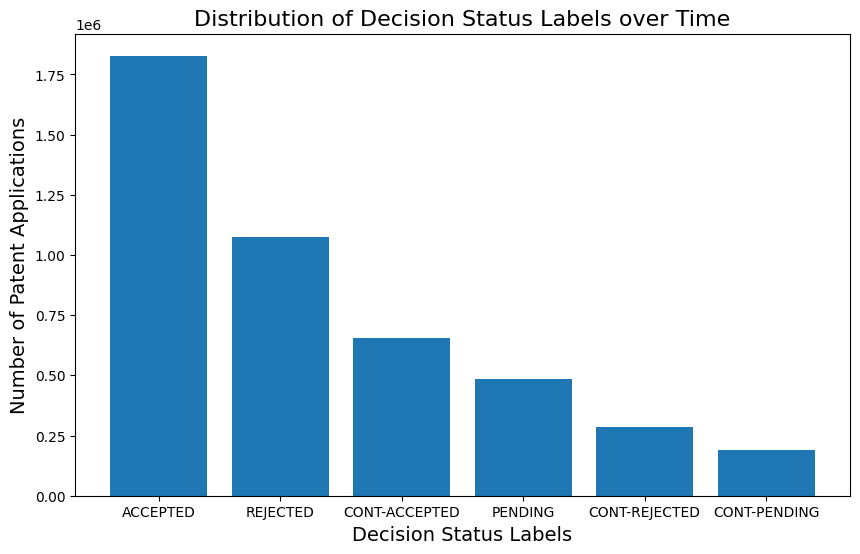

In [ ]:
# Let's plot the numbers above
plt.figure(figsize=(10, 6))
plt.bar(range(len(status_stats)), list(status_stats.values()), align='center')
plt.xticks(range(len(status_stats)), list(status_stats.keys()))

# Specify the x-label, y-label, and title
plt.xlabel('Decision Status Labels', fontsize=14)
plt.ylabel('Number of Patent Applications', fontsize=14)
plt.title('Distribution of Decision Status Labels over Time', fontsize=16)
plt.show()

## Statistics about the IPC/CPC Labels

* How about the distribution of the IPC/CPC labels?

In [ ]:
# Let's restrict our attention to the IPC/CPC labels at the subclass level
df['cpc_sub'] = df.cpc_labels.str[:4]
df['ipc_sub'] = df.main_ipcr_label.str[:4]

In [ ]:
# Unique IPCR subclass labels
print(f'# Unique IPCs: {len(df.ipc_sub.value_counts())}')
print(f'# Unique CPCs: {len(df.cpc_sub.value_counts())}')

# Unique IPCs: 638
# Unique CPCs: 627


* Let's explore the distribution of IPC labels at the subclass level.

In [ ]:
# Note that we also have some patent applications that do not contain IPC/CPC labels
df.ipc_sub.value_counts()

G06F    443760
        237509
H01L    236649
A61K    190728
H04L    144221
         ...  
F24T         1
C13C         1
F99Z         1
C06F         1
F24V         1
Name: ipc_sub, Length: 638, dtype: int64

* Note the second most common label is the empty string, as there are some applications without matched IPC labels.

### Distribution of Accepted and Rejected Patent Applications from 2015 to 2017

* Let's now try to re-cerate the two plots in Figure 2 (with the updated version of the metadata).

In [ ]:
# Import additional libraries and dependencies for some of the computations below
from __future__ import division
from itertools import *
from pylab import *

* We restrict our attention to all the patent applications that were filed to the PTO between 2011 and 2016 (inclusive) and that contain the label "ACCEPTED" in their decision status field.

In [ ]:
# Start and end dates (2015-2017)
start_date = '2015-01-01'
end_date = '2017-12-31'

# Filter the dataframe by the specific ranges
df_2015_2017 = df[df['filing_date'] >= start_date]
df_2015_2017 = df_2015_2017[df_2015_2017['filing_date'] <= end_date]

# Consider the patent applications that have the 'ACCEPTED' decision status label
accepted_rejected_df_2015_2017 = df_2015_2017[(df_2015_2017.decision == 'ACCEPTED') | (df_2015_2017.decision == 'REJECTED') ]

In [ ]:
# Accepted patent applications from 2011 to 2016
accepted_rejected_df_2011_2016_ipc_sub = accepted_rejected_df_2015_2017.ipc_sub.value_counts().to_dict()

# For IPC
values = list(accepted_rejected_df_2011_2016_ipc_sub.values())
labels = list(accepted_rejected_df_2011_2016_ipc_sub.keys())

In [ ]:
# No patent application that doesn't have an IPC subclass label in our restricted collection
for i, elt in enumerate(labels):
    if len(elt) != 4:
        print(values[i])

* In the upcoming parts, we focus only on the most popular 19 IPC subclass codes.


In [ ]:
# Let's get the names and values of those top 19 IPC subclass labels and aggregate all the remaining IPC codes under the name "Other Labels"
_THRESHOLD = 10
new_values = values[:_THRESHOLD]
new_labels = labels[:_THRESHOLD]
new_values.append(np.sum(values[_THRESHOLD:]))
new_labels.append('Other Labels')

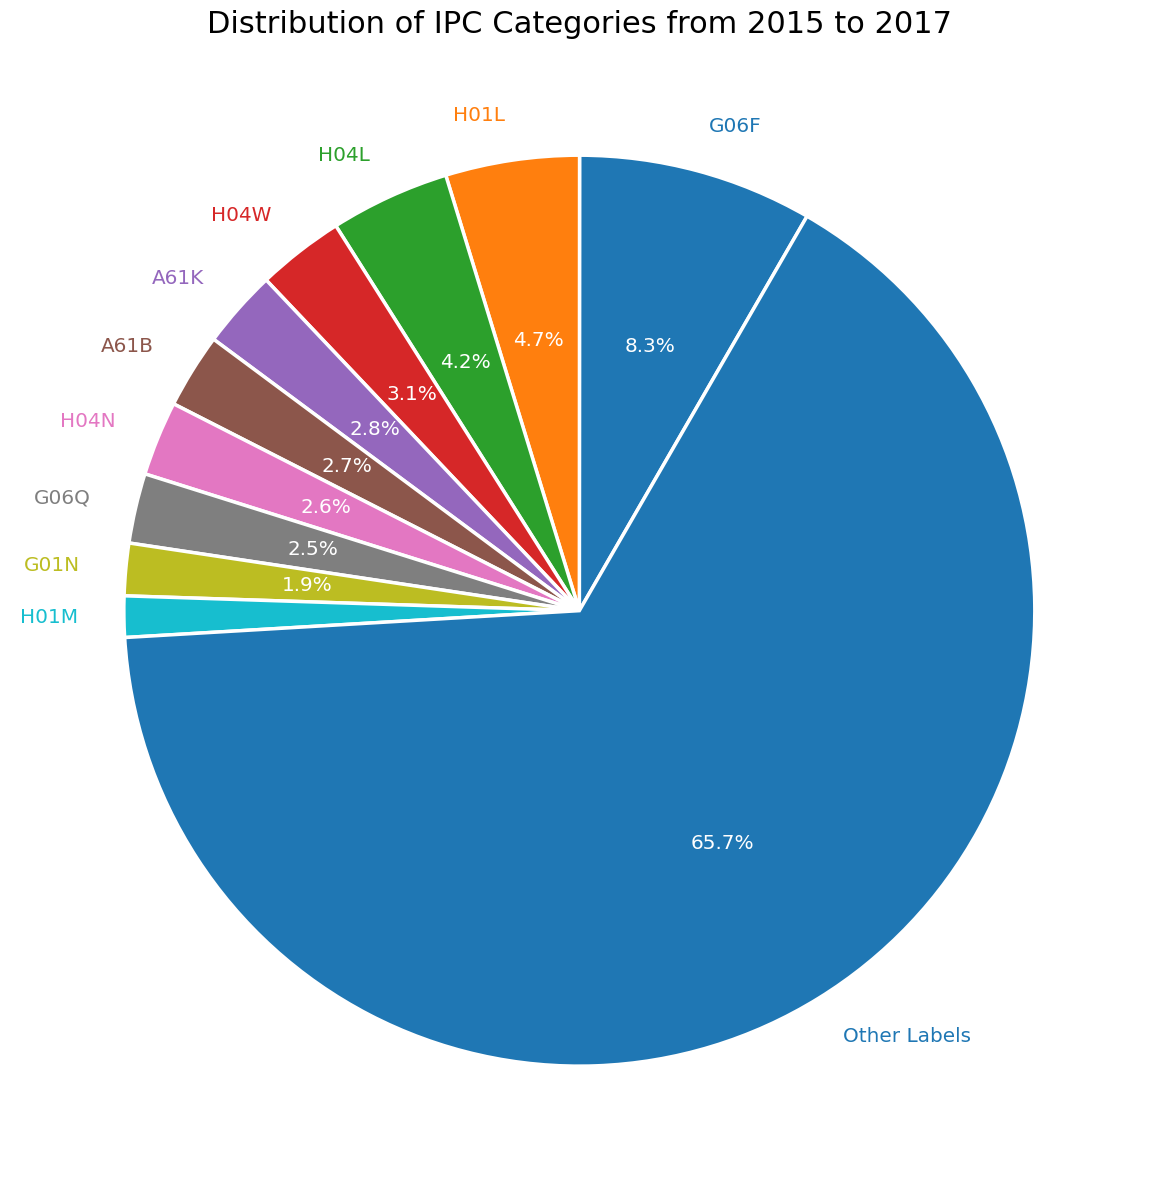

In [ ]:
# Now, let's plot the distribution of IPC categories of "accepted" patent applications from 2011 to 2016 (Figure 2 in the paper)
fig, ax = plt.subplots(figsize=(12, 12))

patches, texts, pcts = ax.pie(
    new_values, labels=new_labels, autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 1.5 else '',
    wedgeprops={'linewidth': 2.5, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=60)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=6)
ax.set_title('Distribution of IPC Categories from 2015 to 2017', fontsize=22)
plt.tight_layout()
plt.savefig('ipc_distrib.png')

We are interested in medical stuff so A61B, A61K, but let's look into the Accpeted and Rejected Rate

<Axes: xlabel='ipc_sub', ylabel='Count'>

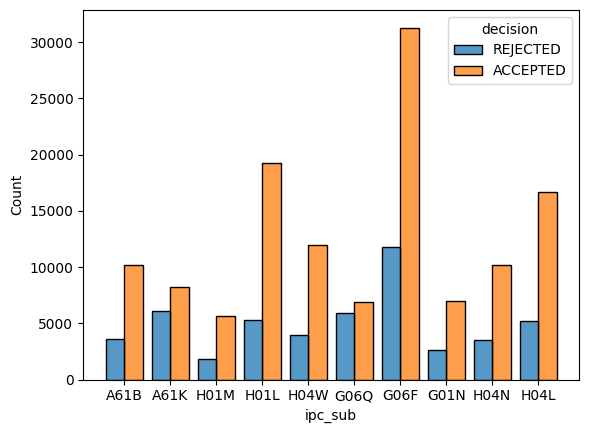

In [ ]:
import seaborn as sns
accepted_rejected_df_2015_2017_19_labels = accepted_rejected_df_2015_2017[accepted_rejected_df_2015_2017.ipc_sub.isin(new_labels)]
sns.histplot(data=accepted_rejected_df_2015_2017_19_labels, x='ipc_sub', hue="decision", multiple="dodge", shrink=.8)


A61K and G06Q has relatively balanced data in comparsion with other labels

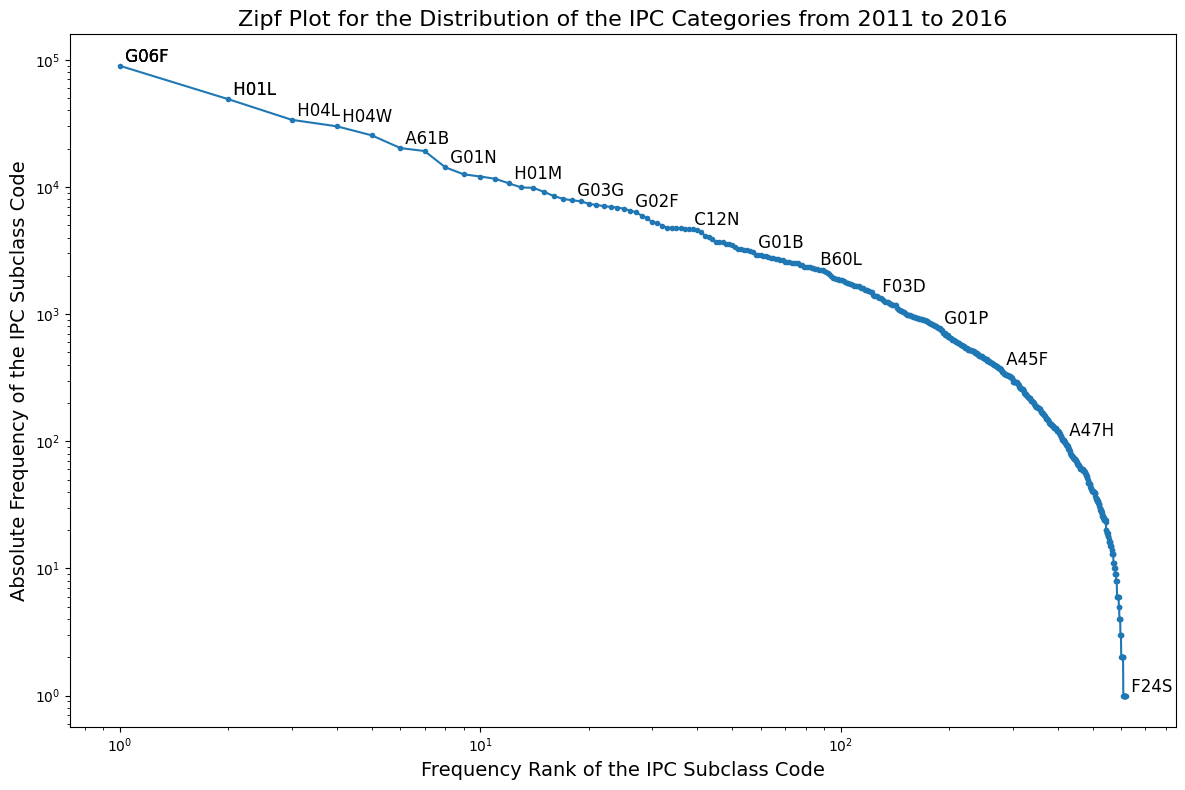

In [ ]:
## Creating the Zipf plot in Figure 2 ##

# We can also create the Zipf plot on the left side of Figure 2
fig, ax = plt.subplots(figsize=(12, 8))
ranks = arange(1, len(values)+1)
loglog(ranks, values, marker=".")

ax.set_title('Zipf Plot for the Distribution of the IPC Categories from 2011 to 2016', fontsize=16)
ax.set_xlabel("Frequency Rank of the IPC Subclass Code", fontsize=14)
ax.set_ylabel("Absolute Frequency of the IPC Subclass Code", fontsize=14)
ax.grid(False)

for n in list(logspace(-0.5, log10(len(values)), 20).astype(int)):
    dummy = text(ranks[n], values[n], " " + labels[n],
                 verticalalignment="bottom",
                 horizontalalignment="left",
                 fontsize=12)

plt.tight_layout()
plt.savefig('zipf_ipc_distrib.png')

## Statistics about the Patent Examiners

* So far, we have looked at the decision status and IPC subclass label distributions, but we can also look at the acceptance ratio of examiners using HUPD. Let's now explore the behaviours of the patent examiners at the PTO.

In [ ]:
# Get the names of 100 patent examiners who examined the most patent applications by number
top100_examiner_names = list((df.examiner_full_name.value_counts()[:100]).keys())

In [ ]:
# Create a temporary dataframe
examiner_dec_df = pd.DataFrame()

# For each examiner in the list above, determine the decisions made by that examiner and add it to the temporary dataframe
for examiner_name in top100_examiner_names:
    decision_stat_dict = ((df[df['examiner_full_name'] == examiner_name])['decision'].value_counts()).to_dict()
    decision_stat_dict['examiner_full_name'] = examiner_name
    examiner_dec_df = examiner_dec_df.append(decision_stat_dict, ignore_index=True)


<ipython-input-21-5aef1f15ec27>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  examiner_dec_df = examiner_dec_df.append(decision_stat_dict, ignore_index=True)
<ipython-input-21-5aef1f15ec27>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  examiner_dec_df = examiner_dec_df.append(decision_stat_dict, ignore_index=True)
<ipython-input-21-5aef1f15ec27>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  examiner_dec_df = examiner_dec_df.append(decision_stat_dict, ignore_index=True)
<ipython-input-21-5aef1f15ec27>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  examiner_dec_df = examiner_dec_df.append(decision_stat_dict, ignore_index=True)


In [ ]:
# Now let's look at that dataframe
examiner_dec_df

,ACCEPTED,REJECTED,CONT-ACCEPTED,PENDING,CONT-REJECTED,CONT-PENDING,examiner_full_name
0,1009.0,378.0,298.0,216.0,77.0,62.0,"ALI, MOHAMMAD M"
1,1140.0,180.0,302.0,281.0,44.0,71.0,"PAUMEN, GARY F"
2,1054.0,278.0,300.0,240.0,61.0,84.0,"NGUYEN, HANH N"
3,923.0,310.0,296.0,249.0,89.0,85.0,"KOSLOW, CAROL M"
4,1103.0,378.0,152.0,251.0,29.0,33.0,"PEDDER, DENNIS H"
...,...,...,...,...,...,...,...
95,801.0,148.0,194.0,196.0,35.0,57.0,"JONES, MELVIN"
96,493.0,403.0,240.0,129.0,102.0,63.0,"NGUYEN, PHONG H"
97,746.0,230.0,168.0,202.0,32.0,52.0,"LOEWE, ROBERT S"
98,729.0,158.0,255.0,183.0,47.0,56.0,"PASCHALL, MARK H"


* The following bar shows the acceptance rate of the top 100 patent examiners at the PTO.

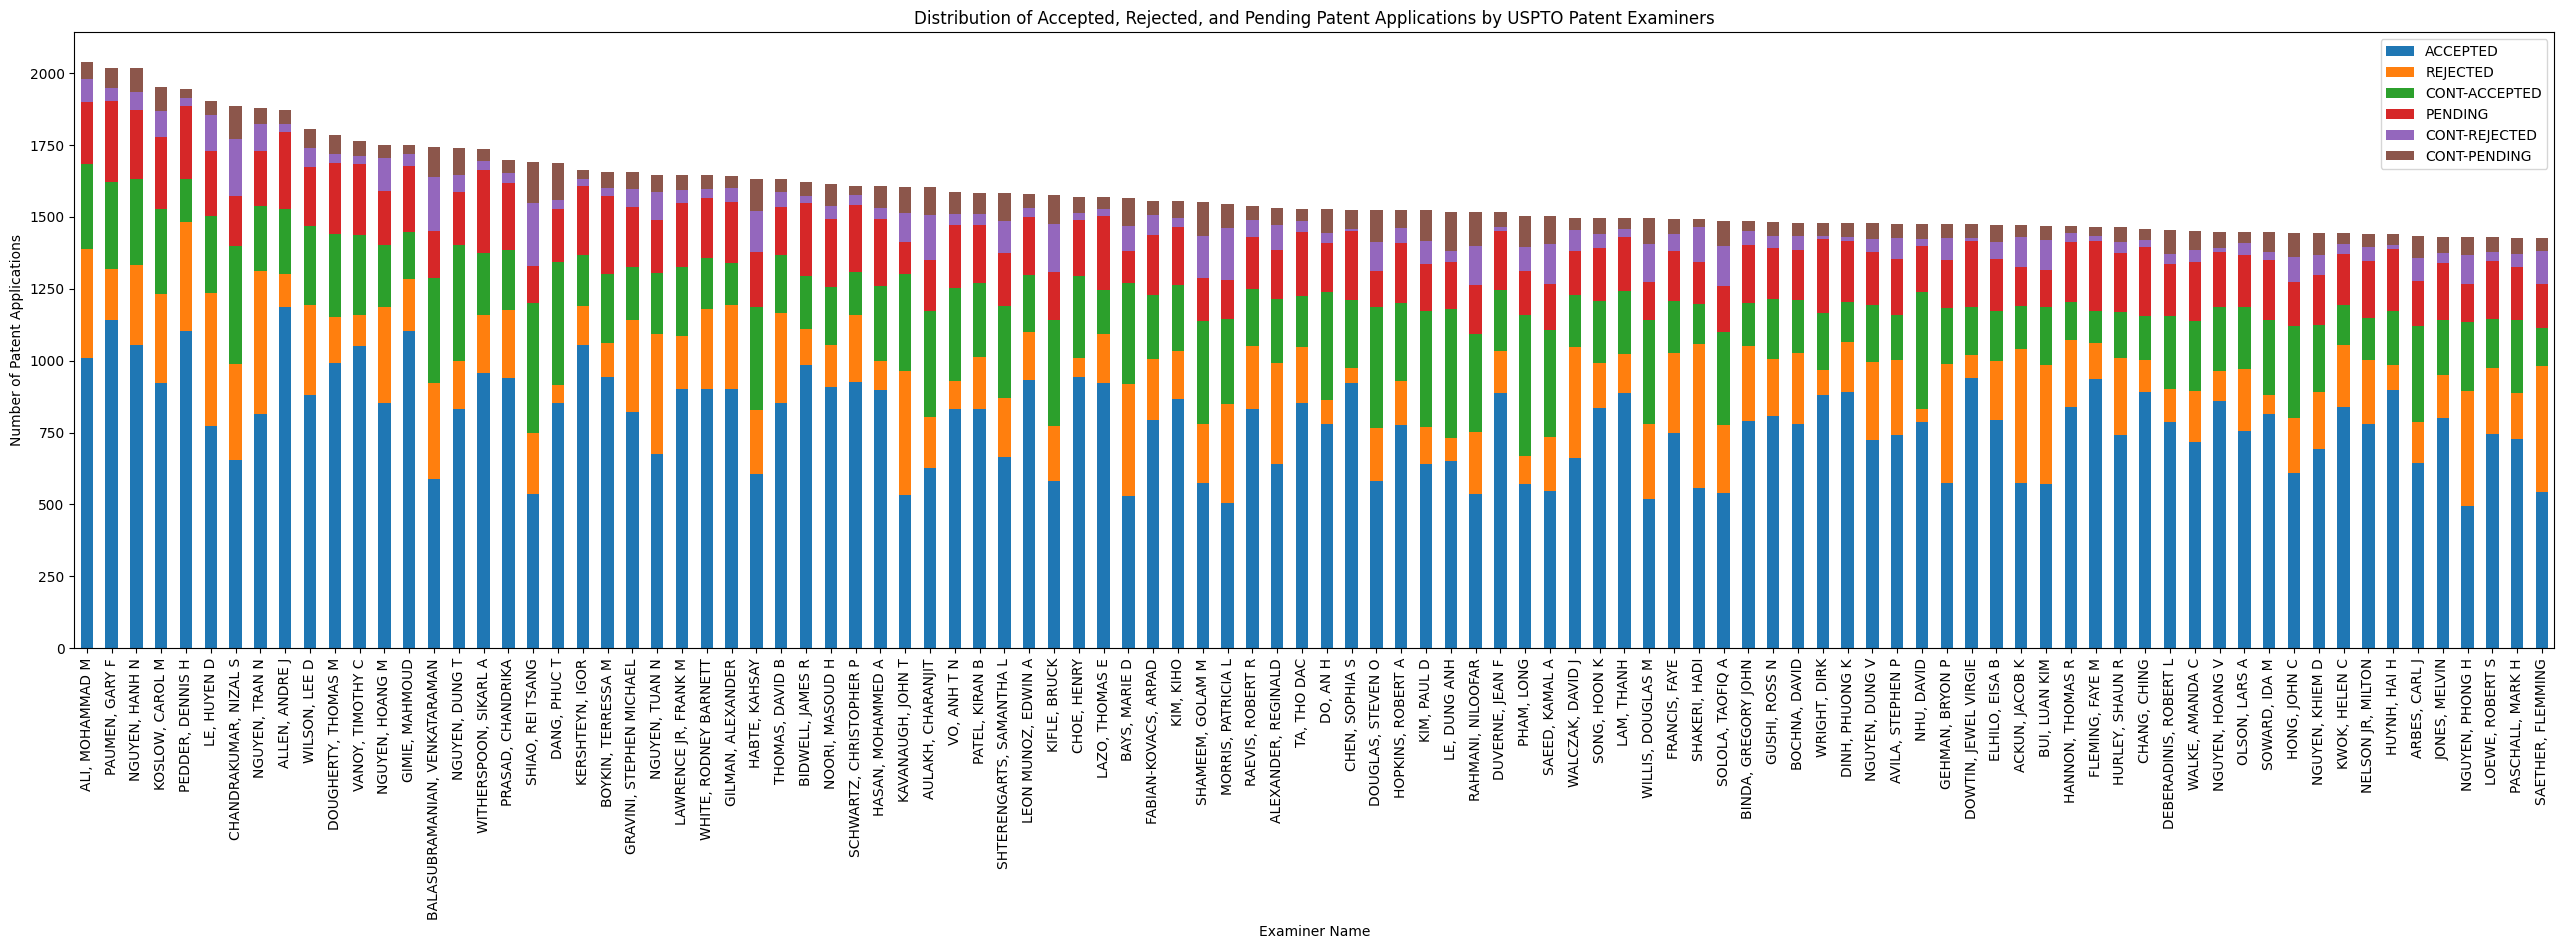

In [ ]:
# Let's plot these numbers above in a nice bar plot
examiner_dec_df.plot.bar(stacked=True, x='examiner_full_name', figsize=(32, 8))
plt.title('Distribution of Accepted, Rejected, and Pending Patent Applications by USPTO Patent Examiners')
plt.xlabel('Examiner Name')
plt.ylabel('Number of Patent Applications')
plt.savefig('basic_examiner_stats.png')

### $\square$ Q.E.D.